# Tracé de cartes choroplèthes avec geopandas

Un outil pratique pour afficher des grandeurs sur des cartes : par département, par canton, par pays...
L'exemple ci-dessous donne le principe d'utilisation de `geopandas` et `geoplot`

Lecture...


<AxesSubplot:>

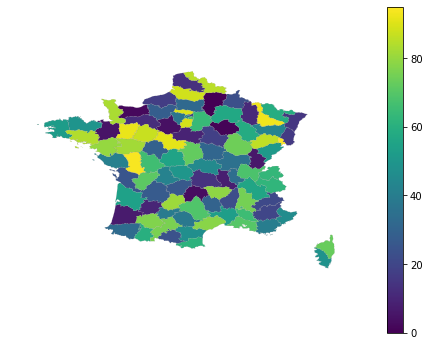

In [2]:
# les imports
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import numpy as np


# je telecharge le geojson qui m'interesse sur ce super site :
# https://france-geojson.gregoiredavid.fr/repo/departements.geojson
# il y a differents niveaux de detail (canton, commune, etc.) à vous de choisir le niveau de finesse
fichier_gjson ="./src/departements.geojson"


print("Lecture...")
geoData= gpd.read_file(fichier_gjson)

# ensuite on remplit la donnee, ici dans l'ordre d'arrivée des 
geoData["donnee"] = np.arange(0,len(geoData))

# on met la donnée sous la forme qui va bien pour pouvoir tracer
geoData2 = geoData.explode(index_parts=True).reset_index()

# carte choroplèthe https://fr.wikipedia.org/wiki/Carte_choropl%C3%A8the
carte=gplt.choropleth(geoData2,
                 hue="donnee",
                 cmap='viridis',
                   linewidth=.1,
                   legend=True,
                   edgecolor='grey')
carte.plot()
plt.show()

À vous de jouer sur les applications que vous avez choisies : récupérez la densité de population par commune, le PIB, ou tout autre scalaire et affichez la valeur sur votre carte...